# Unsupervised Learning

## Clustering of datasets

## 1. Import important libraries

In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv('D:\Akash\Machine Learning\Data_for_ML\Book7.csv')
df.head()

,Name,Age,Income($)
0,rob,27,70000
1,michael,29,90000
2,mohan,29,61000
3,ismail,28,60000
4,kory,42,150000


## 2. Plotting Data 

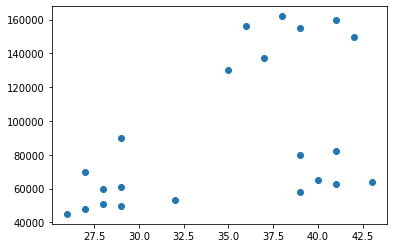

In [31]:
plt.scatter(df['Age'],df['Income($)'])

In [32]:
# here x and y parameters having very large difference 
# we need scaling of data
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df[['Income($)']] = scalar.transform(df[['Income($)']])
scalar.fit(df[['Age']])
df[['Age']] = scalar.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,rob,0.058824,0.213675
1,michael,0.176471,0.384615
2,mohan,0.176471,0.136752
3,ismail,0.117647,0.128205
4,kory,0.941176,0.897436


## 3. Find no. of cluster (elbow method)

In [33]:
from sklearn.cluster import KMeans
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [34]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2818479744366238,
 0.21578607765873023,
 0.17462386586687895,
 0.13762504146528043,
 0.11314812855825189]

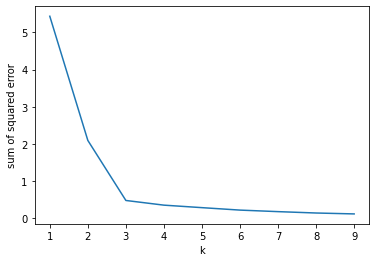

In [35]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng , sse)

## 4. import Kmeans and fit-&-predict data in it 

In [36]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [37]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

## 5. Append result in dataframe

In [38]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,rob,0.058824,0.213675,2
1,michael,0.176471,0.384615,2
2,mohan,0.176471,0.136752,2
3,ismail,0.117647,0.128205,2
4,kory,0.941176,0.897436,1


## 6. plot the result

In [39]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

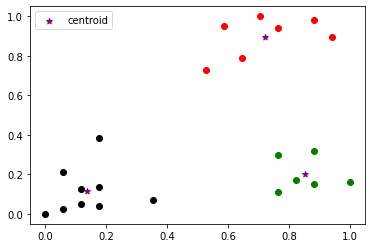

In [40]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
# centroid points
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',
label ='centroid')
plt.legend()